# Math/CS 165 homework 1

Please fill the remainder of this notebook with your code (remove `pass` after "# your code here"), execute all cells, save the notebook on your machine, and upload the notebook only (i.e. not any other files in this folder) to Blackbboard.

## Problem 1

Consider the function 

$$ f(x) = \frac{1}{4} - \frac{\sin(4x)}{x}.$$

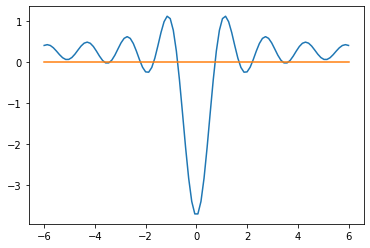

In [46]:
import numpy as np
from matplotlib import pyplot as plt

f = lambda x: 0.25 - np.sin(4*x)/x
g = lambda x: 0*x
x = np.linspace(-6,6,100)

plt.plot(x, f(x))
plt.plot(x, g(x))
plt.show()

Write a python function `multi_bisection` to compute all 10 roots of $f(x)$. 

In [47]:
#from bisection import bisection
import numpy as np
#grid = np.linspace(-6,6,100)
f = lambda x: 0.25 - np.sin(4*x)/x
def multi_bisection(func, grid, n_max): 
    #grid = []
    #for x in (-6,6):
     #   grid.append(x)
    grid = np.arange(-6,6,0.01)
  
    '''
    input: 
        func = function whose roots we want to compute
        grid = numpy array containing a grid of points spanning the interval containing roots
        n_max = maximum number of iterations
    output: 
        returns a python list whose elements are the roots we want to compute
        '''
    left_end = []
    right_end = []
    for i in range(len(grid)-1):
        if f(grid[i])*f(grid[i+1])<0:
        #print(grid[i])
            left_end.append(grid[i])
            right_end.append(grid[i+1])
    roots = []
    for i in range(len(left_end)-1):
        roots.append(bisection(func, left_end[i], right_end[i], n_max))
    return roots

roots = multi_bisection(func=f, grid= np.linspace(-6,6,100), n_max=100)
print('roots = ', roots)
print()
print('max value of |f(roots)| = ', np.vectorize(f)(roots).max() if roots != None else None)

roots =  [-3.6410164707276547, -3.3949964664510857, -2.2098644955973947, -1.679095358956625, -0.7389471547601296, 0.7389471547601296, 1.679095358956625, 2.2098644955973947, 3.3949964664510857]

max value of |f(roots)| =  3.885780586188048e-16


In [45]:
formatted_array = ["%i: %s" % (index, val) for index, val in  enumerate(grid)]
 
print(formatted_array)


[]


In [17]:
def bisection(func, low, high, n_max):
    assert func(low)*func(high)<0
    for i in range(n_max):
        midpoint = (low + high) / 2.0
        if func(low)*func(midpoint)<0:
            high = midpoint
        else:
            low = midpoint
    return midpoint

## Problem 2

Write a function `fixedpoint` that uses fixed-point iteration to compute the fixed point $p$ of a function $g(x)$ using $p_0$ as an initial guess. 

The function `fixedpoint` should compute a number $p^*$ that approximates $p$ to an accuracy given by

$$ \frac{|p^* - p|}{|p|} < 10^{-3}.$$ 

Since you don't know $p$ in advance, you cannot use this stopping criterion in your code, but you can use: 

$$ \frac{|p_{n+1} - p_n|}{|p_n|} < 10^{-3},$$ 

which should accomplish the same thing. The number on the right-hand side of the inequality is called the tolerance. 

`fixedpoint` should use no more than $N_{max}$ iterations. In other words, if the above accuracy cannot be achieved within $N_{max}$ iterations, then `fixedpoint` should stop and print out this fact. 

In [49]:
import numpy as np
def fixedpoint(g, p0, TOL, Nmax): 
    # INPUT: a function g, initial guess p0, error tolerance TOL,
    # and maximum number of interations Nmax
    # OUTPUT:  An approximate fixed point p, or message of failure

    # your code here
    
    p = p0
    for i in range(Nmax):
        p_old = p
        p = g(p)
        if ((p - p_old)/p_old) <TOL:
            return p
    print("Failed D:")
    return none
    pass 

# x = sqrt(2a) ???

Use your function to approximate $\sqrt{2}$ to the numerical accuracy indicated above by using $g(x) = x/2 + a/x$ and choosing $a$ appropriately. Demonstrate, using code output and verbal descriptions (in Markdown and/or comments), that decreasing the tolerance gives better accuracy.

In [65]:
g = lambda x: x/2 + (1/x)
print(fixedpoint(g, 1.4, 1*np.exp(-3), 10))
print(fixedpoint(g, 1.4, 1*np.exp(-50), 10))
print(fixedpoint(g, 1.4, 1*np.exp(-100), 10))

# As the tolerance increases, the most specific fixedpoint value is 1.414213

1.4142857142857141
1.4142135642135643
1.4142135642135643


## Problem 3

Write a function `newton` that uses the Newton method to compute the zeros of the polynomial whose coefficients are the elements of a list `a`. In other words, if `n = len(a)`, then the polynomial is:

$$p(x) = a[n-1] x^{n-1} + a[n-2] x^{n-2} + \cdots + a[1] x^1 + a[0].$$

Implement Newton's method using Horner's method to speed up the evaluation of the polynomial and its derivative. Please do this by having `newton` call a helper function `horner`.

In [120]:
def horner(a, x): 
    # INPUT: coefficients a
    # OUTPUT: p(x) and p'(x)
    b = 0
    b2 = 0
    for coe in reversed(a):
        b2 = b2*x + b
        b = b*x + coe 
    return b,b2
    

def newton(a, p0, TOL, Nmax):
    p = p0
    for i in range(Nmax):
        p_old = p
        fp, dfp = horner(a,p)
        p = p - fp/dfp
        
        if abs(p - p_old) < TOL:
            print('number of iterations:', i)
            return p
    
    
    print('Max iterations reached. :(')
    # your code here

In [126]:
g = lambda x: x**2 +x -1
a = [-1,1,1]
print(newton(a, 0, 1*np.exp(-50), 100))
print(g(0.6180339887498948))

number of iterations: 7
0.6180339887498948
-1.1102230246251565e-16


### Hints: 

* Newton is summarized in Algo 2.3 in the Text
* Horner is sumarized in Algo 2.7 in the Text 




## Problem 4

Use `newton` to compute ALL 10 roots of of the polynomial whose coefficients `a` are given by 


In [127]:
import numpy as np 
a = np.array([-63, 0, 3465, 0, -30030, 0, 90090, 0, -109395, 0, 46189])/256.0
print('coefficients = ', a)

coefficients =  [-2.46093750e-01  0.00000000e+00  1.35351562e+01  0.00000000e+00
 -1.17304688e+02  0.00000000e+00  3.51914062e+02  0.00000000e+00
 -4.27324219e+02  0.00000000e+00  1.80425781e+02]


You will need to run `newton` with the initial guesses:

In [136]:
print(newton(a, 1, 1*np.exp(-20), 100))

number of iterations: 5
0.9739065285171724


In [132]:
thetas = np.pi*(2.0*np.array(range(1,11)) - 1)/20.0
p0s = np.cos(thetas)
print('initial guesses for roots = ', p0s)

initial guesses for roots =  [ 0.98768834  0.89100652  0.70710678  0.4539905   0.15643447 -0.15643447
 -0.4539905  -0.70710678 -0.89100652 -0.98768834]


In [140]:
for p0 in p0s:
    print(newton(a, p0, 1*np.exp(-10), 100))

number of iterations: 3
0.9739065285190207
number of iterations: 2
0.8650633666891075
number of iterations: 2
0.6794095682991544
number of iterations: 2
0.43339539412924727
number of iterations: 1
0.14887433898960642
number of iterations: 1
-0.14887433898960642
number of iterations: 2
-0.4333953941292473
number of iterations: 2
-0.6794095682991538
number of iterations: 2
-0.8650633666891085
number of iterations: 3
-0.9739065285190207
